<div style="border:solid green 2px; padding: 20px">
    
<b>Галина, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделала большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Вот мой личный пример: 
    
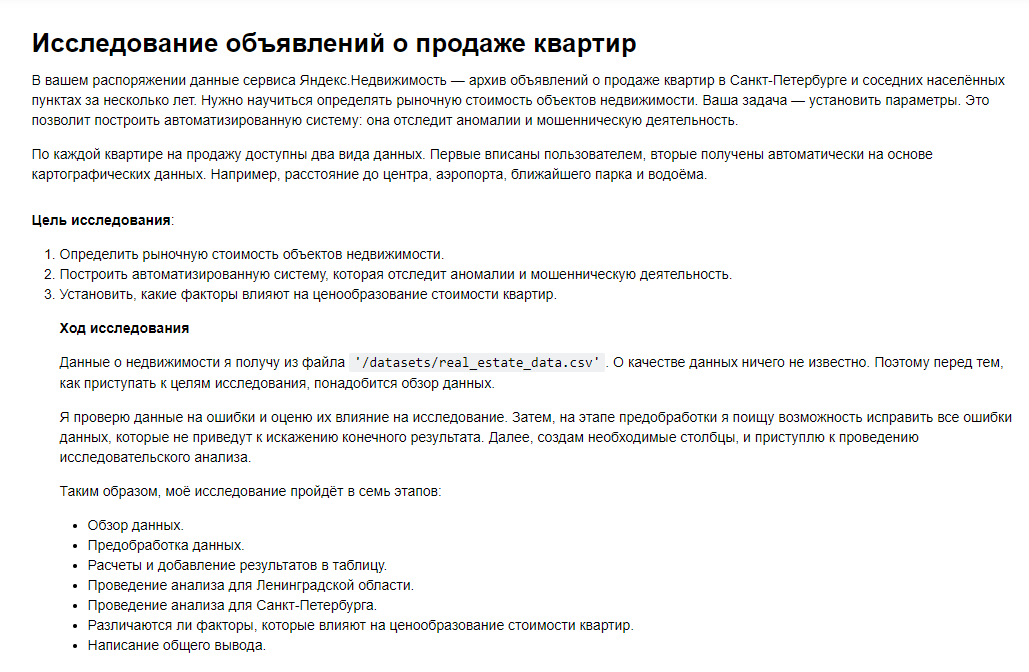
</div>

Отличный пример! Александр, скажи пожалуйста, как отмечать маркдауны цветом? Туплю и не понимаю как)

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
data.head(15)
#изучаем общую информацию, смотрим, какие нулевые и 
#не нулевые значения есть, какие в столбцах типы данных
#проблемы датафрейма, требующие предобработки:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#Проблемы датафрейма, требующие исследования и предобработки:
В строке с индексом 3 "first_day_exposition" хранятся данные типа object, а должен быть тип datetime

строка с индексом 5 - "ceiling_height" как будто много пропусков, количество non-null объектов 14504 вместо 23699

строка с индексом 6 - "floors_total" - есть нулевые значения, но их не так много как в "ceiling_height", 
однако нужно проверить , насколько они повлияют на данные анализа. Так же похоже, что количество этажей 
это целое число (должен быть тип int64), а у нас float64

строка с индексом 7 - "living_area " есть некоторое количество нулевых значений, Ненулевых 21796 из  23699

строка с индексом 9 - "is_apartment" - большое количество Nan - значений, должен быть вид заполнения столбца True/False (булевы значения только(bool))

строка с индексом 12 - "kitchen_area" - ненулевых значений 21421 из 23699, есть пропуски, оценим их важность

строка с индексом 13 - "balcony" - ненулевых значений 12180 из 23699, меньше половины, встречаются и 0.0 и NaN - 
проверим и приведем к одному формату

строка с индексом 14 - "locality_name" - название населенного пункта, есть малое количество пропусков, заполено 23650 из 23699

строка с индексом 15 - "airports_nearest" - много нулевых значений, заполнено 18157 из 23699

строка с индексом 16 - "cityCenters_nearest" - много нулевых значений, заполнено 18180 из 23699
строка с индексом 17 - "parks_around3000" - много нулевых значений, заполнено 18181 из 23699, тип значений float64 можно преобразовать в int64
(выводя первые 15 строк заметила, что числа целые, есть 0.0 и NaN) 
строка с индексом 18 - "parks_nearest" - много нулевых значений, заполнено 8079 из 23699, проверим единицы измерения
строка с индексом 19 - "ponds_around3000" - много нулевых значений, заполнено 18181 из 23699, 
поменяем название заголовка на более лаконичное, тип значений float64 можно преобразовать в int64 
(выводя первые 15 строк заметила, что числа целые, есть 0.0 и NaN) 
строка с индексом 20 - "ponds_nearest" - много нулевых значений, заполнено 9110 из 23699
строка с индексом 21 - "days_exposition" - много нулевых значений, заполнено 20518 из 23699, 
количество дней мы считаем по целому дню, поэтмоу тип значений float64 можно преобразовать в int64 











<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Нет решения по шагу 1.3 (гистограммы). Поправь, пожалуйста
</div>

Строю общую гистограмму для всех числовых столбцов таблицы: 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

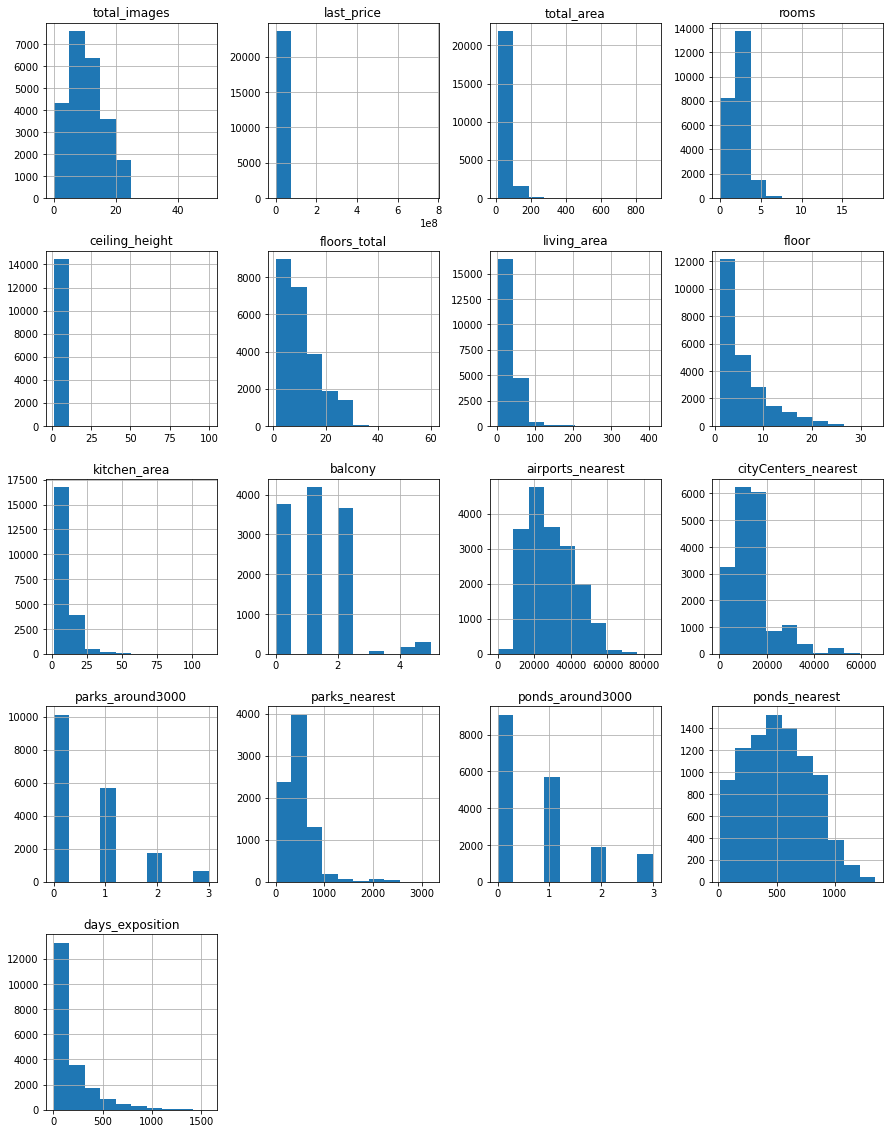

In [2]:
data.hist(figsize=(15, 20))

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
Такие предупреждения можно убрать 2 способами:
    
1. В конец кода добавить `plt.show()`, но для этого нужно вызвать библиотеку `matplotlib.pyplot as plt`
2. В конец кода добавить `;`
    
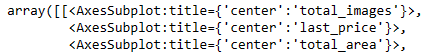
</div>

### Предобработка данных

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

Ой, как здорово! Я не встречала еще кажется такого метода. Опробуем его в деле:

In [3]:
data.columns
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Определим количество пропусков в Датафрейме: 

In [4]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Вывод: по цветовой маркировке и численным значениям вижу, что больше всего пропусков в столбце 'is_apartment', так же много пропусков в 'parks_nearest', 'ponds_nearest', 'balcony', 'ceiling_height'

изучу каждый столбец: моя задача выявить странные и ошибочные значения
далее заменим пропуски, но сначала оставим данные как есть 

In [5]:
data['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

In [6]:
data['last_price'].value_counts()

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64

тип данных поменяем на int64 для удобства чтения

In [7]:
data['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

In [8]:
data['first_day_exposition'].value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2014-12-18T00:00:00      1
2015-04-19T00:00:00      1
2015-08-16T00:00:00      1
2016-07-21T00:00:00      1
2016-09-25T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

Нам важно оставить здесь даты, когда была выставленна квартира, время не указывается в столбцах

In [9]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

есть 197 квартир без комнат, и в 11 квартирах 10 комнат и более

In [10]:
data['ceiling_height'].max()
data['ceiling_height'].value_counts()
data['ceiling_height'].fillna(0)
data['ceiling_height'].describe()
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(25)
data.loc[data['ceiling_height'] >= 20.00, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20.00,'ceiling_height'] / 10
print(data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(25))


       total_images   last_price  total_area first_day_exposition  rooms  \
10159            14   11500000.0        85.6  2018-12-18T00:00:00      3   
3067             13    6600000.0        95.0  2018-09-08T00:00:00      2   
2823              8    2700000.0        39.0  2018-02-01T00:00:00      1   
13224             8   16900000.0       170.0  2019-03-27T00:00:00      6   
14519            17   17600000.0       112.0  2017-01-19T00:00:00      4   
12401            20   91500000.0       495.0  2017-06-19T00:00:00      7   
19142            10    8650000.0        87.7  2017-07-18T00:00:00      2   
1300             14  120000000.0       280.0  2018-07-12T00:00:00      5   
2802              7   14950000.0        50.0  2016-03-06T00:00:00      2   
21923            10  115490000.0       235.0  2017-04-09T00:00:00      5   
1053             13     550000.0        29.0  2018-02-01T00:00:00      1   
464              15   66571000.0       280.3  2015-06-11T00:00:00      6   
12628       

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что не хардкодишь, а используешь условие
</div>

интересно, как будто максимальная высота потолка 100.0! И в каких единицах она считалась... однако самые распостраненные значения: 2.50 - 2.80

In [11]:
data['floors_total'].value_counts()
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean()).astype('int64')
data['floors_total'].describe()

count    23699.000000
mean        10.671379
std          6.585316
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

как будто тут все впорядке

In [12]:
data['living_area'].value_counts()
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

тут много знаков после запятой, есть пропущенные 1963 значения

In [13]:
data['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

Наиболее популярные этажи квартир, выставленных на продажу: 1-5, а наиболее редкие объявления о продаже квартир на 28-31 этажах

In [14]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

данный столбец содержит булевы значения (True/False), но так же 20,924 пропусков, надо разбираться дальше. Может быть это связано с тем, что столбец добавили позже,а не с момента появления датафрейма

In [15]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [16]:
data['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

In [17]:
data['kitchen_area'].value_counts()

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 971, dtype: int64

In [18]:
data['balcony'] = data['balcony'].fillna(0).astype('int64')
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

в столбце 3758 0.0 значений (заменим все пропуски на 0), а так же поменяем формат на int64

In [19]:
data['locality_name'].value_counts(ascending=True)
data['locality_name'].unique()
data['locality_name'].duplicated().sum()
duplicated_df = data[data['locality_name'].duplicated()] 
duplicated_df
#data['locality_name'] = data['locality_name'].drop_duplicates().reset_index(drop=True)
data['locality_name'].head(10)
data['locality_name'].unique()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].unique()
data['locality_name'] = data['locality_name'].replace('село Никольское', 'Никольское')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('городской посёлок Рощино', 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('коттеджный поселок Лесное', 'Лесное')
data['locality_name'] = data['locality_name'].replace('деревня Рабитицы', 'поселок Рабитицы')
data['locality_name'] = data['locality_name'].replace('садовое товарищество Приладожский', 'поселок городского типа Приладожский')
data['locality_name'] = data['locality_name'].replace('городской поселок Рощино', 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('поселок станции Громово', 'поселок Громово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Большая Ижора', 'городской поселок Большая Ижора')
data['locality_name'] = data['locality_name'].replace('поселок Гарболово', 'деревня Гарболово')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Лесогорский', 'городской поселок Лесогорский')
data['locality_name'] = data['locality_name'].replace('городской поселок Мга', 'поселок городского типа Мга')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')
data['locality_name'].unique()



array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Слан

заменили букву ё на е, убрали неявные дубликаты методом replace() но слишком громоздкое решение, наверное тут нужен цикл или словарь

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный код

In [20]:
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8275, dtype: int64

In [21]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['cityCenters_nearest'].value_counts()

0.0        5519
8460.0       61
20802.0      32
10720.0      30
20444.0      27
           ... 
5278.0        1
11575.0       1
3205.0        1
12747.0       1
4234.0        1
Name: cityCenters_nearest, Length: 7643, dtype: int64

заменили пропуски на 0, посмотрели результаты

In [22]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

в столбце 10106 0.0 значений, а остальные: 1.0 2.0 3.0 (можно привести к int64)

In [23]:
data['parks_nearest'].value_counts()

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
2489.0     1
786.0      1
793.0      1
92.0       1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64

In [24]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

в столбце 9071 0.0 значений, а остальные: 1.0 2.0 3.0 можно привести к int64

In [25]:
data['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
1075.0     1
74.0       1
1236.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

In [77]:
data['days_exposition'].value_counts()

0       3181
45       880
60       538
7        234
30       208
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1142, dtype: int64

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Не обязательно заполнять все пропуски. Например в столбце `days_exposition` я бы рекомендовал их оставить, как есть. Т.к. любая замена - это или случайное число или заглушка. Которые исказят результаты исследовательского анализа
</div>

убрала замену пропусков)

<div class="alert alert-block alert-info">
    

__Комментарий студента__

Лучше писать в синей ячейке. Чтобы ревьюер не пропустил, если будут вопросы 
</div>

переведем в int64 и заменим пропуски на 0

теперь преобразуем данные:

поменяем тип данных в столбце на int64 и выведем результат:

In [27]:
data['last_price'] = data['last_price'].astype('int64')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

приведем формат столбца только к дате, ведь время не указано и выведем результат: 

In [28]:

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.date
data['first_day_exposition']


0        2019-03-07
1        2018-12-04
2        2015-08-20
3        2015-07-24
4        2018-06-19
            ...    
23694    2017-03-21
23695    2018-01-15
23696    2018-02-11
23697    2017-03-28
23698    2017-07-21
Name: first_day_exposition, Length: 23699, dtype: object

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Давай лучше неиспользуемый код удалим. Для партфолио?
</div>

Убрала черновой вариант)

In [29]:
data['living_area'].value_counts()
data['living_area'].describe()
#много знаков после запятой и пропусков. 
#можем посчитать процент жилой площади по всей в выборке 
data['living_area'].mean()
#и добавить для строк с пропусками 
data['living_area'] = data['living_area'].fillna(data['living_area'].mean())
data['living_area'].sort_values(ascending=False).tail(25)
#и посмотрим, как выглядят последние отсортированные значения списка

21908    9.8
22473    9.1
4542     9.0
4100     9.0
19620    9.0
22252    9.0
1326     9.0
7312     9.0
8325     9.0
15833    9.0
680      9.0
17248    8.9
21505    8.5
2309     8.4
114      8.3
20994    8.0
23208    8.0
19251    6.5
16431    6.0
21943    5.4
17582    5.0
3242     3.0
23574    3.0
13915    2.0
21758    2.0
Name: living_area, dtype: float64

In [30]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верно, ведь это булевый столбец
</div>

пропуски в столбце is_apartment поменяли на False

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Ты ведь уже меняла балконы на 0
</div>

Да, почему то продублировалось, удалила)

In [32]:
#data['locality_name'].value_counts()
data[data['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000,81.7,2016-04-15,3,3.55,5,50.8,2,False,...,8.8,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147
2033,6,5398000,80.0,2017-05-30,3,NaN,4,42.6,2,False,...,18.6,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,34
2603,20,3351765,42.7,2015-09-20,1,NaN,24,15.6,3,False,...,10.7,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276
2632,2,5130593,62.4,2015-10-11,2,NaN,24,33.1,21,False,...,8.2,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256
3574,10,4200000,46.5,2016-05-28,2,NaN,5,30.8,5,False,...,6.5,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45


Не очень понятна пророда пропусков в столбце. 

In [33]:
data['airports_nearest'].describe()
data[data['airports_nearest'].isna()].head(30)
data['airports_nearest'] = data['airports_nearest'].fillna(0).astype('int64')

Переведем растояние до аэропорта в int64 и заменим пропуски. Однако во всем столбце их очень много, заполнено только 18157 из 23699. Вопрос в том, можем ли мы еще где то подчерпнуть информацию (например, запросить у коллег) или можем пренебречь данными столбца.

In [34]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].describe()


count    23699.000000
mean         0.469049
std          0.748534
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [35]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [36]:
data['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [37]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

заменили пропуски на 0, перевели в int64 для удобства просмотра

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Аналогично
</div>

Удалила

Посмотрим общую финальную информацию

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Второй раздел сделан хорошо. Проверены основные возможные проблемы в данных.

### Посчитайте и добавьте в таблицу новые столбцы

Добавляем новый столбец с ценой одного квардратного метра: 

In [40]:
data['square_meter_price'] = data['last_price'] / data['total_area']
data['square_meter_price'] = data['square_meter_price'].astype('int64')
data['square_meter_price'].head(10)


0    120370
1     82920
2     92785
3    408176
4    100000
5     95065
6     99195
7    110544
8     87454
9     88524
Name: square_meter_price, dtype: int64

для удобства просмотра приведем к целочисленным значениям, выведем 10 значений для просмотра

Добавляем день недели публикации объявления (0 — понедельник, 1 — вторник и так далее), а далее месяц и год: 
Будем выводить первые 10 значений для проверки корректности работы кода. 

In [41]:
#добавляю столбец дня:
data['day_of_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.weekday
data['day_of_exposition'].head(10)



0    3
1    1
2    3
3    4
4    1
5    0
6    3
7    3
8    2
9    6
Name: day_of_exposition, dtype: int64

In [42]:
#добавляю столбец месяца:
data['month_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.month
data['month_exposition'].head(10)


0     3
1    12
2     8
3     7
4     6
5     9
6    11
7     4
8     5
9     2
Name: month_exposition, dtype: int64

In [43]:
#добавляю столбец года:
data['year_exposition'] = pd.to_datetime(data['first_day_exposition']).dt.year
data['year_exposition'].head(10)

0    2019
1    2018
2    2015
3    2015
4    2018
5    2018
6    2017
7    2019
8    2018
9    2017
Name: year_exposition, dtype: int64

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

Беру на заметку!

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

Добавляю тип этажа квартиры (значения — «первый», «последний», «другой»):

In [44]:
def cat_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_cat'] = data.apply(cat_floor, axis=1)  
data['floor_cat'].value_counts()

другой       17443
последний     3339
первый        2917
Name: floor_cat, dtype: int64

Тут я создала функцию, котора проверяет, является ли этаж первым или совпадает с числом этажей в здании, если иное - выведет "другое"
Вывод: у нас в датафрейме преобладают квартиры, расположенные не на первом и не на последнем этажах

Добавлю столбец с расстоянием до центра города в километрах (переведем из м в км и округлим до целых значений:

In [45]:

data['distance_to_center'] = (data['cityCenters_nearest'] / 1000).fillna(0).astype('int64')
data['distance_to_center'].head(10)


0    16
1    18
2    13
3     6
4     8
5     0
6    19
7    11
8     0
9    15
Name: distance_to_center, dtype: int64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

#### Общая жилплощадь:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

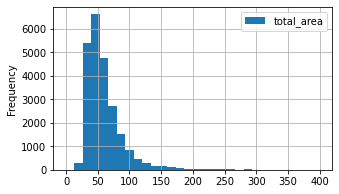

In [46]:
data.plot(y = 'total_area', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,400))
data['total_area'].describe()


Вывод:Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60.348651, а медиана 52 кв м. Распределение данных нормальное или Гаусса. Наибольшее количество квартир имеет среднюю площадь в районе 45-52 кв м, с 200 м кв тянется хвост графика, там мы встречаем одиночные значения квартир большей площади

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь метод range() для определения пиковых значений
</div>

#### Жилая площадь

count    23699.000000
mean        34.457852
std         21.127391
min          2.000000
25%         19.000000
50%         31.100000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

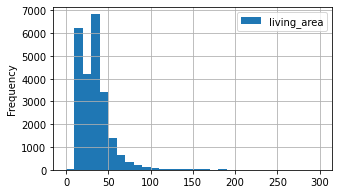

In [47]:
data.plot(y = 'living_area', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,300))
data['living_area'].describe()


Вывод: жилая  площадь в нашей выборке колеблется от 2 до 409,7 м2, среднее значение 34.457852, а медиана 31,1 кв м. Распределение данных похоже на распределение Пуассона. Наибольшее количество квартир имеет среднюю жилую площадь в районе 30 кв м, с 130 м кв тянется хвост графика, там мы встречаем одиночные значения квартир большей жилой площади

#### Площадь кухни:

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

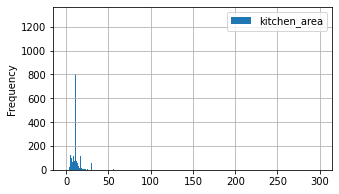

In [48]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 3030, grid=True, figsize = (5,3), range = (0,300))
data['kitchen_area'].describe()


Вывод: площадь кухни в нашей выборке колеблется от 1,3 до 112 м2, среднее значение 10.569807, а медиана 9.1 кв м. Распределение данных похоже на распределение Пуассона. Наибольшее количество квартир имеет среднюю  площадь кухни в районе 5-7 кв м, с 70 м кв тянется хвост графика, там мы встречаем одиночные значения квартир большей  площади кухни 

#### Цена объекта: 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

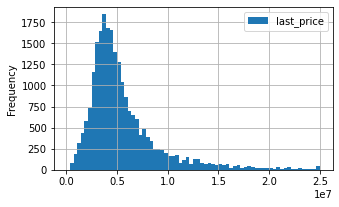

In [49]:
data.plot(y = 'last_price', kind = 'hist', bins = 70, grid=True, figsize = (5,3), range = (0, 25000000))
data['last_price'].describe()


Вывод: стоимость объекта в нашей выборке колеблется от 12190 до 763млн, среднее значение 6.54 млн, а медиана 4,65 млн. Распределение данных нормальное или Гаусса. Наибольшее количество квартир имеет среднюю  стоимость районе 3-5 млн, с 17 млн остаются малые количества более дорогих квартир

#### Количество комнат

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

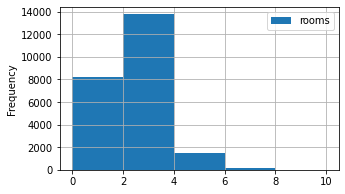

In [50]:
data.plot(y = 'rooms', kind = 'hist', bins = 5, grid=True, figsize = (5,3), range = (0, 10))
data['rooms'].describe()


Вывод: количество комнат в нашей выборке колеблется от 0 (возможно, это студии или свободная планировка) до 19(тут могут иметь место выбросы или загородные дома), среднее значение 2 комнаты, а медиана так же 2 комнаты. Распределение данных похоже на распределение Пуассона. Наибольшее количество квартир имеет от 2 до 4 комнат, с 8 комнат тянется хвост графика, там лишь одиночные значения

#### Высота потолков

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

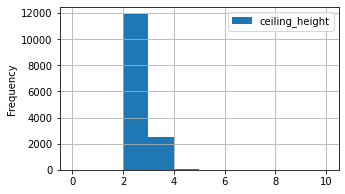

In [51]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0, 10))
data['ceiling_height'].describe()


Вывод: высота потолков в нашей выборке колеблется от 1 (возможно, кладовые или технические помещения) до 14(тут могут иметь место выбросы или загородные дома, а так же двухуровневые квартиры и складские зоны), среднее значение 2,7 метра, а медиана 2,65 метра. Сказать точно про распределение данных тяжело, у нас очень небольшой разброс значений. Наибольшее количество квартир имеет высоту потолков от 2 до 3 метров, с 5 метров тянется хвост графика, там лишь одиночные значения

#### этаж квартиры

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

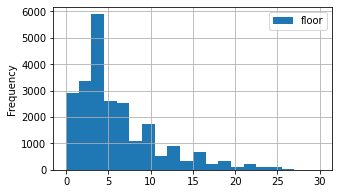

In [52]:
data.plot(y = 'floor', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0, 30))
data['floor'].describe()




Вывод: Этажность квартир в нашей выборке колеблется от 1 (квартиры на первом этаже или торговые помещения) до 33(тут могут иметь место выбросы квартиры в небоскребах), среднее значение 5,9, а медиана соответствует 4 этажу. Вид графика похож на распределение данных Пуассона. Наибольшее количество квартир находится на 3-4 этажах, с 27 этажа метров тянется хвост графика, там лишь одиночные значения

#### тип этажа квартиры («первый», «последний», «другой»)

другой       17443
последний     3339
первый        2917
Name: floor_cat, dtype: int64

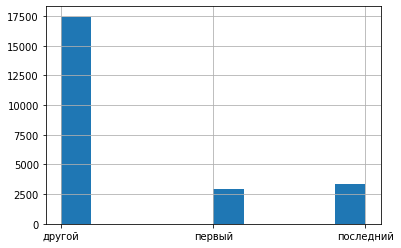

In [53]:
data['floor_cat'].hist()
data['floor_cat'].value_counts()

Вывод: гистограмма составлена по выборке по столбцу из датафрейма, где есть всего 3 варианта значения. Наиболее распостранены объекты недвижимости, расположенные не на 1 и не на последнем этаже, их количество составляет 73,6% от общего числа объектов недвижимости, значительно меньше (около 14,4%) объектов располагаются на последнем этаже, а 12% объектов находятся на первом этаже. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Полученные данные соответствуют реалиям
</div>

#### общее количество этажей в доме

count    23699.000000
mean        10.671379
std          6.585316
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

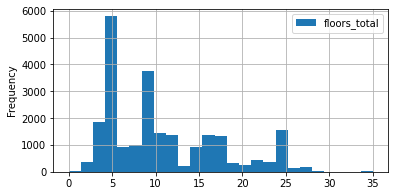

In [54]:
data.plot(y = 'floors_total', kind = 'hist', bins = 25, grid=True, figsize = (6,3), range = (0, 35))
data['floors_total'].describe()


Вывод: Этажность домов в нашей выборке колеблется от 1 (квартиры на первом этаже или торговые помещения) до 60 (тут могут иметь место выбросы или небоскребы), среднее значение высоты здания 10,7 этажей, а медиана соответствует 9 этажу. Вид графика похож на распределение данных Пуассона. Наибольшее количество домов имеет 4-6 этажей, с 30 этажных домов тянется хвост графика, там лишь одиночные значения (есть небольшое скопление значений около 35 этажности домов). 

#### расстояние до центра города в метрах

count    23699.000000
mean     10886.426896
std       9634.613697
min          0.000000
25%       2242.000000
50%      11247.000000
75%      15248.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

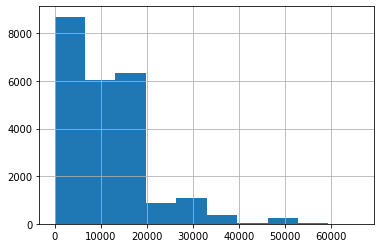

In [55]:
data['cityCenters_nearest'].hist()
data['cityCenters_nearest'].describe()
data['cityCenters_nearest'].value_counts()
data['cityCenters_nearest'].describe()

Вывод: Если посмотреть через value_counts()значения в столбце, то как будто много пустых значений (5519). Однако график распределения похож на распределение данных Пуассона. При этом наибольшая часть объектов находится на расстоянии менее 700м до центра города, а небольшой пик в хвосте гистограммы приходится на 50 км от центра города. Мы видим по параметру describe() среднее расстояние до центра города 10886.426896, а медиана призодится на 11247м. При этом наименьшее расстояние до центра соответствует 0 м. Может быть это квартиры, находящиеся в самом центре населенного пункта? Максимальная удаленность от центра города составляет 65968м, что может быть вбросом (или объект находится в поселке, например, а расстояние считалось, скажем, до центра Санкт-Петербурга). 

#### расстояние до ближайшего аэропорта

count    23699.000000
mean     22060.285497
std      16455.276292
min          0.000000
25%      10196.500000
50%      21869.000000
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64

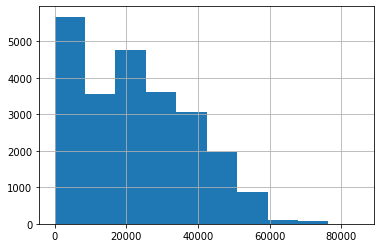

In [56]:
data['airports_nearest'].hist()
data['airports_nearest'].describe()
#data['airports_nearest'].value_counts()


Вывод: Если посмотреть через value_counts()значения в столбце, то как будто много пустых значений (5543). Однако график распределения похож на распределение данных Пуассона. При этом наибольшая часть объектов находится на расстоянии менее 10 км до аэропорта, а второй пик объектов располагается на расстоянии около 19-23км от аэропорта, хвост гистограммы тянется до 80км от аэропорта, далее количество значений стремится к нулю. Мы видим по параметру describe() среднее расстояние до аэропорта 22060.28м, а медиана призодится на 21869м. При этом наименьшее расстояние до аэропорта соответствует 0 м(может быть здесь представленны объекты, расположенные прямо на взлетно-посадочной полосе? Думаю, имеют дело пропущенные данные). Максимальная удаленность от аэропорта составляет почти 85км, что может быть вбросом. 

#### расстояние до ближайшего парка

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

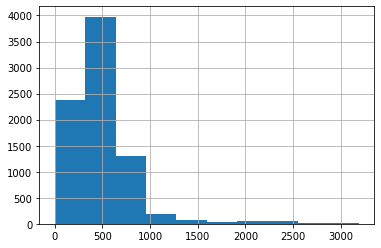

In [57]:
data['parks_nearest'].hist()
data['parks_nearest'].describe()

Вывод: расстояние до парка в нашей выборке колеблется от 1м (квартиры вероятно с выходом к парку или в домах, граничащих с парковой зоной) до 3190 (тут могут иметь место выбросы просчитаны расстояния до крупных заповедников и парков), среднее значение расстояния до парка составляет 490м, а медиана соответствует 455м. Вид графика похож на распределение данных Пуассона. Наибольшее количество домов расположено примернов полукилометре от парка, с а значений более 2500м от парка становится крайне мало, тут тянется хвост гистограммы. 

#### день и месяц публикации объявления

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

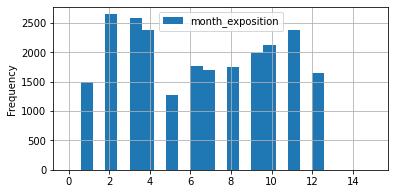

In [58]:

data.plot(y = 'month_exposition', kind = 'hist', bins = 25, grid=True, figsize = (6,3), range = (0, 15))
data['month_exposition'].describe()


Вывод: месяц продажи домов в нашей выборке колеблется от 1 (пик гистограммы тут приходится на 2 месяца) до 12, среднее значение месяца продажи 6,4, а медиана соответствует 6 месяцу.  Наибольшее количество домов было продано в феврале, следующий значительный пик приходится март, а далее на ноябрь, летом мы видим спад продаж квартир

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В мае не до продаж, все на огородах =)
</div>

count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_exposition, dtype: float64

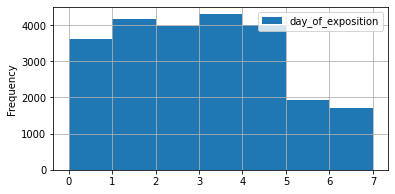

In [59]:
data.plot(y = 'day_of_exposition', kind = 'hist', bins = 7, grid=True, figsize = (6,3), range = (0, 7))
data['day_of_exposition'].describe()


Вывод: день продажи домов в нашей выборке колеблется от понедельника (=0) (пик гистограммы приходится на четверг) до воскресения(=6), среднее значение дня продажи среда, а медиана соответствует четвергу.  Наибольшее количество домов было продано в четверг, еще один значительный пик приходится на вторник, а далее на четверг, хуже всего с продажами в выходыне

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

##### Постройте гистограмму.
##### Посчитайте среднее и медиану.
##### В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

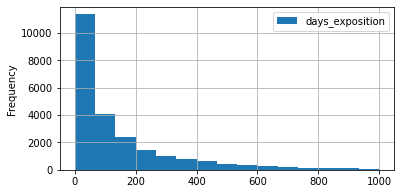

In [60]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 15, grid=True, figsize = (6,3), range = (0, 1000))
data['days_exposition'].describe()


Вывод: Скорость продажи квартир в нашей выборке колеблется от 0 (либо это молниеносные продажи квартир, либо не заполненные значения) до 1580 дней (квартиры, котороые по ряду причин продавались длительное время), среднее значение продажи квартиры составляет 156.6 дней, а медиана соответствует 74 дням (в два раза ниже среднеарефметического значения. Вид графика похож на распределение данных Пуассона. Наибольшее количество квартир продавалось менее чем за 65 дней, с 800 дня продаж тянется хвост графика, там лишь одиночные значения. 
Быстрыми продажами мы посчитаем те, которые принадлежат пику на гистограмме - до 65 дней. Необычно длительными продажами мы посчитаем те, которые составляют более 800 дней (но может здесь квартиры, которые просто формально не были сняты с объявления или возникла ошибка при заполнении датафрейма?). 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Давай тут уменьшим range до 100 или 200 (ведь именно в эти дни происходят основные продажи), возможно тут есть интересные аномалии. Так же в таких моментах лучше делать колличество корзин = колличеству дней (в соответствии с range)
</div>

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

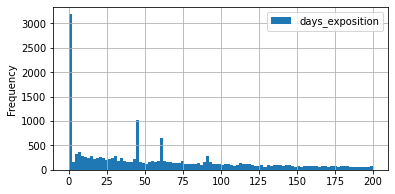

In [79]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (6,3), range = (0, 200))
data['days_exposition'].describe()


Вывод: Близко ко нулю есть большое количество значений продажи квартир - возможно это некорректно заполненные данные или квартиры по очень привлекательной стоимости, которые были очень быстро куплены. Второй пик прихотится на примерно на 45 день продажи, а третий примерно на 60-ый. Далее скорость продаж квартир начинает постепенно уменьшатся и после 200 дня стремится к 0. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Тут важно порассуждать как аналитик, почему именно 45 и 60 дней? С чем это связано?
    
Эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил
</div>

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
#### Изучите, зависит ли цена от:

#### общей площади;
#### жилой площади;
#### площади кухни;
#### количества комнат;
#### этажа, на котором расположена квартира (первый, последний, другой);
#### даты размещения (день недели, месяц, год).

##### Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

Зависимость цены от общей площади недвижимости:

0.6536750579657242

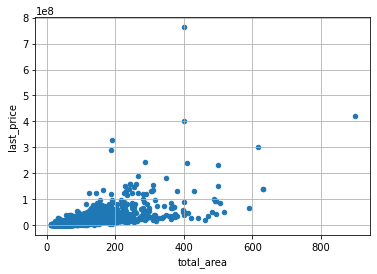

In [61]:
data.plot(x='total_area', y='last_price', kind = 'scatter', grid=True)
data['total_area'].corr(data['last_price'])

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что зависимость переменных рассматриваешь через тип графика scatter
</div>

Вывод: На графике мы распределили точечно значения зависимости  площади от стоимости продажи квартиры для оценки корреляции. И посчитали коэффициет корреляции Пирсона.значения графика сливаются в горизонтальную фигуру с небольшим уклоном на верх, но есть отдельные точки, не принадлежащие общей массе, вероятно они соответствуют некоторым выбросам. 
Коэффициент Пирсона положительный и составляет 0.6536750579657242. Это нам говорит о наличии прямой зависимости между площадью квартиры и стоимостью ее продажи, но эта зависимость не велика. 


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

Зависимость цены от жилой площади недвижимости: 

0.5422603540381887

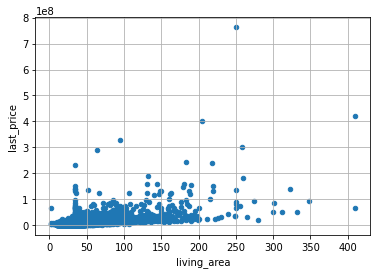

In [62]:
data.plot(x='living_area', y='last_price', kind = 'scatter', grid=True)
data['living_area'].corr(data['last_price'])

Вывод: На графике мы распределили точечно значения зависимости жилой площади от стоимости продажи квартиры для оценки корреляции. И посчитали коэффициет корреляции Пирсона.
Значения графика сливаются в горизонтальную фигуру, но есть отдельные точки, не принадлежащие общей массе, вероятно они соответствуют некоторым выбросам. 
Коэффициент Пирсона положительный и составляет 0.5422603540381887. Это нам говорит о наличии незначительной прямой зависимости между жилой площадью квартиры и стоимостью ее продажи. 

Зависимость цены от площади кухни недвижимости: 

0.5198690130216392

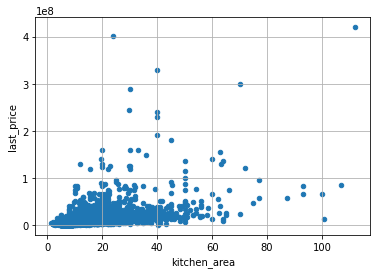

In [63]:
data.plot(x='kitchen_area', y='last_price', kind = 'scatter', grid=True)
data['kitchen_area'].corr(data['last_price'])
#data_pivot = data.pivot_table(index='last_price',  columns=['total_area', 'living_area', 'kitchen_area'])
#data_pivot = data.pivot_table(index=['category_name', 'subcategory_name'], columns='source', values='visits', aggfunc='sum')



Вывод: На графике мы распределили точечно значения зависимости площади кухни от стоимости продажи квартиры для оценки корреляции. И посчитали коэффициет корреляции Пирсона.
Значения графика сливаются в горизонтальную фигуру, но есть отдельные точки, не принадлежащие общей массе, вероятно они соответствуют некоторым выбросам. 
Коэффициент Пирсона положительный и составляет 0.5198690130216392. Это нам говорит о наличии незначительной прямой зависимости между жилой площадью квартиры и стоимостью ее продажи, но площадь кухни влияет много меньше, чем зависимоть от жилой и общей площади квартиры. 

Зависимость цены от количества комнат в недвижимости: 

0.3633428499648948

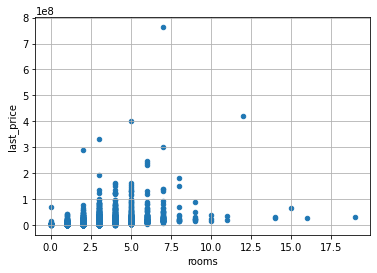

In [64]:
data.plot(x='rooms', y='last_price', kind = 'scatter', grid=True)
data['rooms'].corr(data['last_price'])

Вывод: На графике мы распределили точечно значения зависимости количества комнат от стоимости продажи квартиры для оценки корреляции. И посчитали коэффициет корреляции Пирсона. Значения графика распределяются по столбцам соответствующим количеству комнат (тут не может быть промежуточных значений) но есть отдельные точки, не принадлежащие общей массе, вероятно они соответствуют некоторым выбросам. Коэффициент Пирсона положительный и составляет 0.3633428499648948. Это нам говорит о наличии незначительной прямой зависимости между количеством комнат квартиры и стоимостью ее продажи, но количество комнат влияет много меньше, чем зависимоть от жилой и общей площади квартиры.

Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой) в недвижимости: 

,mean,count,median
floor_cat,,,
другой,6.675470e+06,17443,4850000
первый,4.803560e+06,2917,3900000
последний,7.360274e+06,3339,4300000


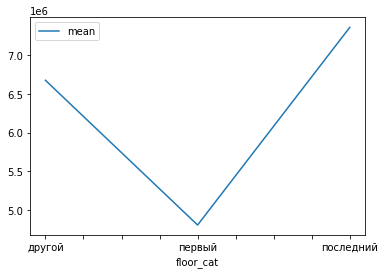

In [65]:
#data_pivot = data.pivot_table(index='last_price', values= 'floor_cat', aggfunc='mean')

#data_pivot.plot(x='floor_cat', y='last_price', kind = 'bar', grid=True)
#data_pivot['floor_cat'].corr(data_pivot['last_price'])

pivot_table_floor_category = data.pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'mean')
pivot_table_floor_category


Вывод: На графике мы распределили  значения зависимости типа этажа от стоимости продажи квартиры для оценки корреляции.  Значения графика распределяются следущим образом: пик приходится на последний этаж - любой кроме первого и последнего, а низшая точка графика соответствует объявлениям о продаже на первом этаже. Сделать какие то значительные выводы на основании этого графика проблематично.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

А если сгруппировать по медиане?
</div>

Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой) в недвижимости (сгрупировано по медиане):

,mean,count,median
floor_cat,,,
другой,6.675470e+06,17443,4850000
первый,4.803560e+06,2917,3900000
последний,7.360274e+06,3339,4300000


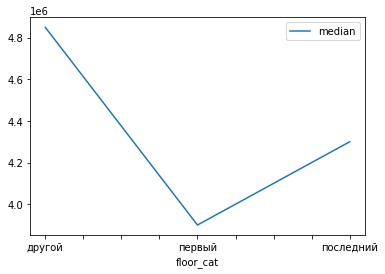

In [80]:

pivot_table_floor_category = data.pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Вывод: Вывод: На графике мы распределили значения зависимости типа этажа от стоимости продажи квартиры для оценки корреляции значений. Значения графика распределяются следущим образом: пик приходится на "другой" этаж - любой кроме первого и последнего, а низшая точка графика соответствует объявлениям о продаже на первом этаже. 
Почему возникает такая разница при использовании среднеарифметического и медианы? Думаю, среднеарифметическое здесь очень сильно корректируется за счет вборсов: Поэтому при подсчете по среднеарифметическому мы видим, что наибольшее значение кривой графика соответствует последнему этажу. Вероятно, кроме стандартных квартир там продавалось еще некоторое количество, скажем, пентхаусов. Даже если их было немного, но они повлияли на распределение значений на графике. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

Зависимость цены от даты размещения (день недели, месяц, год) в недвижимости: 

Зависимость от дня

,mean,count,median
day_of_exposition,,,
1,6.394233e+06,4183,4730000
2,6.627970e+06,3974,4700000
0,6.511613e+06,3612,4650000
3,6.708663e+06,4295,4650000
4,6.372131e+06,4000,4585000
5,6.976804e+06,1936,4555000
6,6.246180e+06,1699,4550000


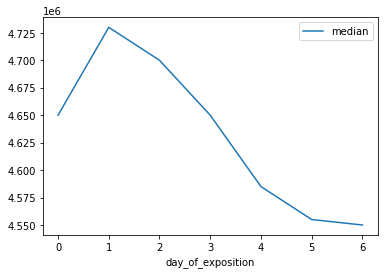

In [66]:
#data.plot(x='day_of_exposition', y='last_price', kind = 'hexbin', grid=True)
data['day_of_exposition'].corr(data['last_price'])
pivot_table_day_expo = data.pivot_table(index = 'day_of_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_day_expo.columns = ['mean', 'count', 'median']
pivot_table_day_expo.plot(y = 'median')

pivot_table_day_expo.sort_values('median', ascending = False)

Вывод: На графике мы распределили  значения зависимости стоимости от дня продажи квартиры для оценки корреляции.  Значения графика распределяются следущим образом: пик приходится на вторник, а низшая точка графика соответствует объявлениям о продаже выходных.
коэффициент корреляции Пирсона:0.0015501452176215405, прямой зависимости между значением дня недели и стоимостью продаж не наблюдается.

Зависимость от месяца

,mean,count,median
month_exposition,,,
4,6.737198e+06,2379,4800000
9,6.825470e+06,1981,4700000
11,6.461363e+06,2371,4700000
12,7.011731e+06,1641,4700000
2,6.468500e+06,2640,4650000
3,6.359275e+06,2587,4650000
7,6.649337e+06,1695,4650000
1,6.668233e+06,1500,4600000
8,6.350233e+06,1744,4570000


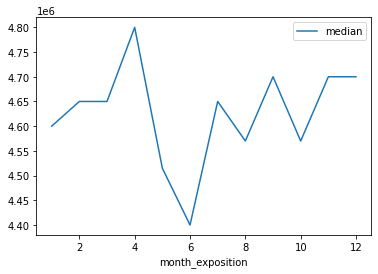

In [67]:
#data.plot(x='month_exposition', y='last_price', kind = 'scatter', grid=True)
data['month_exposition'].corr(data['last_price'])
pivot_table_month_expo = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_expo.columns = ['mean', 'count', 'median']
pivot_table_month_expo.plot(y = 'median')

pivot_table_month_expo.sort_values('median', ascending = False)



Вывод:На графике мы распределили  значения зависимости стоимости от месяца продажи квартиры для оценки корреляции.  Значения графика распределяются следущим образом: пик приходится на апрель, второй пик на сентябрь, а низшая точка графика соответствует объявлениям о продаже в июне, но фактически спад продаж затрагивает все лето. Коэффициент Пирсона положительный и составляет 0.0027791287507397166. прямой зависимости между значением месяца продажи  и стоимостью не наблюдается.

Зависимость от года

,mean,count,median
year_exposition,,,
2014,1.208714e+07,137,7700000
2015,8.572833e+06,1191,5350000
2019,6.782388e+06,2879,5050000
2016,6.827912e+06,2783,4550000
2018,5.950966e+06,8519,4550000
2017,6.585729e+06,8190,4500000


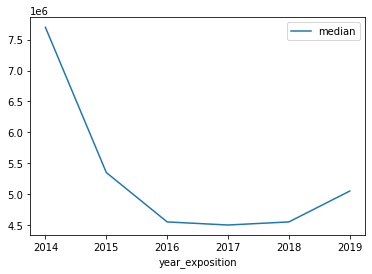

In [68]:
data['year_exposition'].corr(data['last_price'])

pivot_table_year = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']
pivot_table_year.plot(y = 'median')

pivot_table_year.sort_values('median', ascending = False)

Вывод: На графике мы распределили  значения зависимости стоимости от года продажи квартиры для оценки корреляции.  Значения графика распределяются следущим образом: пик приходится на 14 год, небольшой подъем на 19 год, а низшая точка графика соответствует объявлениям о продаже 16-17 годах. Коэффициент Пирсона отрицательный и составляет -0.043089036199508615 есть признаки обратной зависимости, незначительные.
Фактически мы видим падение цен на продажу квартир с 14 по 16 год (в среднем).  

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Давай рассмотрим динамику цены и площади продаваемых квартир. И потом пересмотрим выводы, т.к., возможно, упала не столько цена, сколько площадь продаваемых квартир?
</div>

Корреляция стоимости недвижимости от площади продаваемых квартир:

,mean,count,median
total_area,,,
900.00,420000000.0,1,420000000.0
401.00,401300000.0,1,401300000.0
618.00,300000000.0,1,300000000.0
285.70,245000000.0,1,245000000.0
410.00,240000000.0,1,240000000.0
...,...,...,...
54.33,1300000.0,1,1300000.0
14.00,1190000.0,1,1190000.0
28.60,2034000.0,5,1060000.0


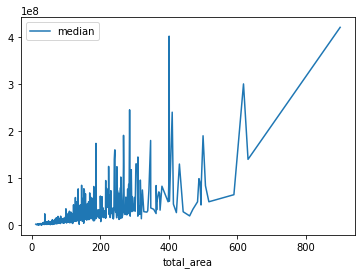

In [82]:
data['total_area'].corr(data['last_price'])

pivot_table_year = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']
pivot_table_year.plot(y = 'median')

pivot_table_year.sort_values('median', ascending = False)


Вывод: На графике мы распределили значения зависимости стоимости недвижимости  от площади квартиры для оценки корреляции значений. Значения графика распределяются следущим образом: пик приходится на 400 метров,  подъем и пик кривой на 600 метрах, а низшая точка графика стремится к нулеовй отметке. Коэффициент Пирсона положительный и составляет 0.6536750579657242 наблюдается прямая зависимость между параметрами.  Фактически мы видим пропорциональный рост стоимости недвижимости от общей площади квартир (вероятно резкие пики еще имеет смысл соотнести с выбросами).

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №2__

Немного не так. Ниже показал
</div>

,mean,count,median
year_exposition,,,
2014,1.208714e+07,137,7700000
2015,8.572833e+06,1191,5350000
2019,6.782388e+06,2879,5050000
2016,6.827912e+06,2783,4550000
2018,5.950966e+06,8519,4550000
2017,6.585729e+06,8190,4500000


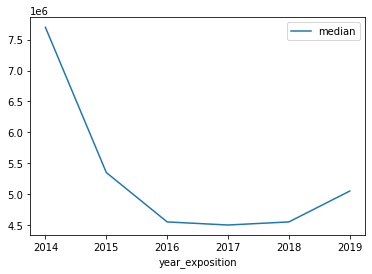

In [81]:
data['year_exposition'].corr(data['last_price'])

pivot_table_year = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']
pivot_table_year.plot(y = 'median')

pivot_table_year.sort_values('median', ascending = False)

,mean,count,median
year_exposition,,,
2014,86.249854,137,76.26
2015,71.558371,1191,60.00
2016,62.156144,2783,53.10
2017,60.759249,8190,52.00
2019,59.467864,2879,52.00
2018,57.677386,8519,50.50


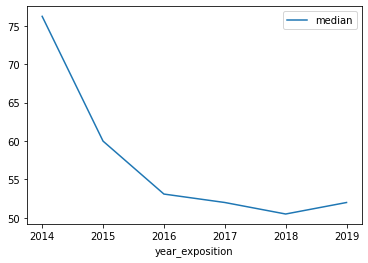

In [82]:
data['year_exposition'].corr(data['last_price'])

pivot_table_year = data.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']
pivot_table_year.plot(y = 'median')

pivot_table_year.sort_values('median', ascending = False)

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [69]:
data_locality = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
data_locality.columns = ['count', 'mean']

data_locality = data_locality.sort_values('count', ascending = False).head(10)
data_locality


,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
поселок Мурино,556,85681.305755
Кудрово,472,95324.476695
поселок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
поселок Парголово,327,90175.489297
Гатчина,307,68745.693811


Самая высока стоимпость квадратного метра в Санкт-Петербурге, здесь же и самое большое количество объявлений

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

Пересчитаем через медиану:

In [83]:
data_locality = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'median'])
data_locality.columns = ['count', 'median']

data_locality = data_locality.sort_values('count', ascending = False).head(10)
data_locality

,count,median
locality_name,,
Санкт-Петербург,15721,104761.0
поселок Мурино,556,85878.0
Кудрово,472,95675.0
поселок Шушары,440,76876.0
Всеволожск,398,65789.0
Пушкин,369,100000.0
Колпино,338,74723.5
поселок Парголово,327,91642.0
Гатчина,307,67796.0


Вывод: видно на примере Санкт-Петербурга и  Пушкино, насколько разнятся медиана и среднее арифметическое. Вероятно именно тут имеют место аномально высокие нечасто появляющиеся цены на недвижимость или выбросы. 

максимальная стоимость

In [70]:
data_locality = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
data_locality.columns = ['count', 'mean']
data_locality = data_locality.sort_values('count', ascending = False).head(10)    
data_locality[data_locality['mean'] == data_locality['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


минимальная стоимость

In [71]:
data_locality = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
data_locality.columns = ['count', 'mean']
data_locality[data_locality['mean'] == data_locality['mean'].min()]

,count,mean
locality_name,,
деревня Старополье,3,11206.0


#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [72]:
sp_data_sale = data.query('locality_name == "Санкт-Петербург"')
sp_data_sale.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 15721 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          15721 non-null  int64  
 1   last_price            15721 non-null  int64  
 2   total_area            15721 non-null  float64
 3   first_day_exposition  15721 non-null  object 
 4   rooms                 15721 non-null  int64  
 5   ceiling_height        10104 non-null  float64
 6   floors_total          15721 non-null  int64  
 7   living_area           15721 non-null  float64
 8   floor                 15721 non-null  int64  
 9   is_apartment          15721 non-null  bool   
 10  studio                15721 non-null  bool   
 11  open_plan             15721 non-null  bool   
 12  kitchen_area          14342 non-null  float64
 13  balcony               15721 non-null  int64  
 14  locality_name         15721 non-null  object 
 15  airports_nearest   

In [73]:
sp_data_sale['kilometers_from_center'] = data['cityCenters_nearest'] / 1000
sp_data_sale['kilometers_from_center'] = sp_data_sale['kilometers_from_center'].fillna(999999)
sp_data_sale['kilometers_from_center'] = sp_data_sale['kilometers_from_center'].astype('int')
sp_data_sale['kilometers_from_center'].value_counts().index

price_km = (sp_data_sale.pivot_table(index='kilometers_from_center', values='square_meter_price', aggfunc='mean'))
price_km


/tmp/ipykernel_48/1826478991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_data_sale['kilometers_from_center'] = data['cityCenters_nearest'] / 1000
/tmp/ipykernel_48/1826478991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_data_sale['kilometers_from_center'] = sp_data_sale['kilometers_from_center'].fillna(999999)
/tmp/ipykernel_48/1826478991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,square_meter_price
kilometers_from_center,
0,174401.571429
1,166603.312500
2,146662.420195
3,129415.891635
4,137475.039691
5,146978.789337
6,152277.455319
7,141399.287469
8,120580.929851


In [ ]:
plot_price_km = price_km
plot_price_km['km'] = price_km.index
plot_price_km

In [ ]:
plot_price_km.plot(x='km', y='square_meter_price' ,style='o-', title = 'Зависимость стоимости квадратного метра от расстояния до центра города', grid = True);



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная визуализация. В твой код добавил заголовок и сетку, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

Большое спасибо! 

In [76]:

plot_price_km['km'].corr(data['square_meter_price'])

-0.30132211346656096

##### Опишите, как стоимость объектов зависит от расстояния до центра города:
Вывод: На графике мы распределили значения зависимости стоимости квадратного метра от удаленности от центра города для оценки корреляции параметров. 
Значения графика распределяются следущим образом: пик приходится на минимальную удаленность от центра города, так же некоторое пиковое значение приходится на объект, расположенный в пяти километрах от центра города, а низшая точка графика соответствует объявлениям о продаже около 28-30 км от центра города. Но еще один пик появляется в области 26 км от центра города, коэффициент корреляции Пирсона:-0.30132211346656096, что отображает небольшую обратную зависимость между параметрами: чем меньше удаленность от центра города, тем выше цена объекта. 


### Общий вывод

### Шаг 5. Напишите общий вывод

Я обработала полученный датафрейм: обработала пропущенные значения в необходимых ячейках, поменяла типы данных на оптимальные для работы и анализа данных. 
Я посчитала новые сводные значения: стоимость квадратного метра жилья, определила день, месяц и год публикации объявления и вынесла это в отдельные столбцы, а так же классифицировали все объявления по типу этажей в квартире. Так же я определила расстояние до центра города в километрах.
Я изучила параметры на наличие аномальных значений: площадь, цена, число комнат, высота потолков и скорректировали аномальные значения. 
Определение времени, даты и года продаж помогает определить оптимальные даты для продвижения продажи квартиры. 
Я определила зависимость количества проданных квартир от этажности: оказалось, что в большинстве своем успешно продаются квартиры, расположенные не на первом и не на последнем этаже. Вероятно это связано с тем, что квартиры на первом этаже могут быть небезопасными, а квартиры на последнем этаже могут иметь проблемы с сохранением тепла и подтеканиием крыши и самыми комфортными для проживания являются промежуточные варианты. 
По удаленности от центра города мы определили, что стоимость квартир снижается, видимо изза снижения престижа и снижения уровня комфортного окружения. В центре квартиры имеют сравнительно более высокую стоимость.  




<div class="alert alert-block alert-danger">
    

__Комментарий от ревьюера №1__

Давай немного увеличим объем вывода, он получился скудным. Хорошей практикой обязательное описание об основных результатах исследования, иначе непонятно, зачем мы его проводили
    
---    
    
Так же после исследования, бизнесу нужны будут рекомендации.

Так, для коррекции общего вывода я еще раз вернусь к начальным условиям:

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Вот мой личный пример: 
    
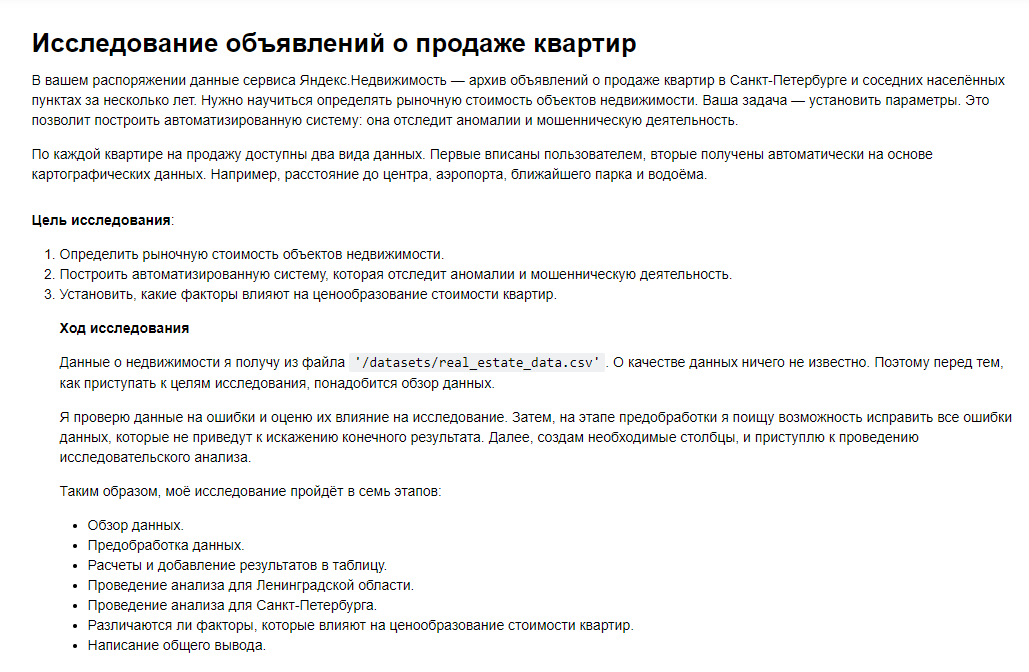
</div>

Я обработала полученный датафрейм: обработала пропущенные значения в необходимых ячейках, поменяла типы данных на оптимальные для работы и анализа данных. Я посчитала новые сводные значения: стоимость квадратного метра жилья, определила день, месяц и год публикации объявления и вынесла это в отдельные столбцы, а так же классифицировали все объявления по типу этажей в квартире. Так же я определила расстояние до центра города в километрах. Я изучила параметры на наличие аномальных значений: площадь, цена, число комнат, высота потолков и скорректировали аномальные значения. Определение времени, даты и года продаж помогает определить оптимальные даты для продвижения продажи квартиры. Я определила зависимость количества проданных квартир от этажности: оказалось, что в большинстве своем успешно продаются квартиры, расположенные не на первом и не на последнем этаже. Вероятно это связано с тем, что квартиры на первом этаже могут быть небезопасными, а квартиры на последнем этаже могут иметь проблемы с сохранением тепла и подтеканиием крыши и самыми комфортными для проживания являются промежуточные варианты. По удаленности от центра города мы определили, что стоимость квартир снижается, видимо изза снижения престижа и снижения уровня комфортного окружения. В центре квартиры имеют сравнительно более высокую стоимость.

Мы достигли поставленных в исследовании целей:
- Определили рыночную стоимость недвижимости
- Построили автоматизированную модель, которая визуализирует и помогает отслежиывать выбросы и аномалии
- Установили, какие факторы (и благодаря коэффициенту корреляции Пирсона оценили, в какой мере) влияют на стоимость продажи квартир

Оказалось, что на рыночную стоимость продажи квартир в большей степени влияет площадь квартиры, а так же день и месяц выставления объявления на продажу, а так же важную роль играет локация квартиры - ее близость к центру города ( или нахождения в крупном городе - Санкт-Петербурге). Как оказалось, площадь кухни и количество жилых комнат в меньшей мере влияло на стоимость продажи квартиры, а так же сама этажность квартиры не так важна, но лучше, если она не находится на первом этаже. 

Рекомендации: наиболее любопытный фактор, на который возможно влиять это планирование публикация объявлений, ведь теперь мы знаем, что ближе ко вторнику-среде, в марте-апреле и октябре квартиры продаются в большем объеме, а летом нормально ожидать спад продаж. Так же мы можем рекомендовать более тщательно собирать информацию об общей площади квартиры, ее близости к центру, чтобы не было ошибочных данных и пропусков, ведь это важный параметр для определения стоимости квартиры. Так же мы провели большую работу с устранением дубликатов в разделе названий населенных пунктов - возможно можно предлагать пользователю выбрать название из списка, чтобы избежать потери важной информации. 

Стало ли лучше? нужно ли еще что нибудь добавить? 

(мне пришла в голову идея, что было бы еще интересно посмотреть корреляцию между количеством фотографий и скоростью и суммой продажи квартиры, тут определенно должна быть закономерность, которая позволила бы конкретизировать наши рекомендации бизнесу)


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Супер, всё четко и лаконично. Да, можно дополнительно искать интересные инсайды) У тебя полный карт-бланш)
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Шаг 1.3 (гистограммы)

2) Уменьшить range, чтобы рассмотреть пики

3) Финальный вывод

4) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод